# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
url= "creditcard.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#no of 0s and 1s in "class" section

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Plotting Histograms

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
#df.hist(bins=50,figsize=(20,15))

## Train Test Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

In [14]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:227845
 Rows in test set:56962



In [15]:
#equal distribution of class(0,1)-----------using Stratified Sampling

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [18]:
for train_index,test_index in split.split(df,df['Class']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [19]:
strat_test_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
263020,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00,0
11378,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85,0
147283,88326.0,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,...,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07,0
219439,141734.0,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,...,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99,0
36939,38741.0,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,46329.0,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,...,0.183183,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,35.97,0
184616,126310.0,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,...,-0.058383,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,297.63,0
274532,166070.0,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,...,-0.120079,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,16.39,0
269819,163789.0,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,...,0.327882,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,19.95,0


In [20]:
strat_test_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,94528.926811,-0.003181,0.001924,0.001532,0.000079,-0.000698,0.004685,-0.000307,0.001736,-0.002807,...,-0.001479,-0.001211,-0.000202,0.001109,0.002622,-0.000504,0.000282,-0.000615,89.042896,0.001720
std,47486.417917,1.957791,1.660157,1.520112,1.415887,1.382965,1.336478,1.231741,1.205777,1.103746,...,0.732772,0.725571,0.612490,0.606951,0.521444,0.483381,0.398388,0.342373,247.696490,0.041443
min,2.000000,-37.558067,-42.172688,-32.454198,-5.263068,-40.427726,-19.996349,-31.197329,-50.688419,-9.481456,...,-22.757540,-8.887017,-26.751119,-2.822384,-7.495741,-1.855355,-9.845808,-8.412267,0.000000,0.000000
25%,54093.750000,-0.922012,-0.597742,-0.885412,-0.855101,-0.689776,-0.767032,-0.556383,-0.211144,-0.654460,...,-0.229432,-0.543363,-0.161485,-0.353306,-0.318244,-0.329162,-0.071348,-0.053144,5.500000,0.000000
50%,84476.500000,0.014539,0.069051,0.179703,-0.013487,-0.052099,-0.274488,0.039029,0.018431,-0.053372,...,-0.030054,0.007985,-0.011928,0.041618,0.018827,-0.053818,0.000895,0.011321,22.000000,0.000000
75%,139143.500000,1.315764,0.802856,1.029285,0.747315,0.615923,0.403490,0.570031,0.325590,0.593091,...,0.186474,0.529293,0.147841,0.442355,0.354786,0.241305,0.090562,0.078955,76.530000,0.000000
max,172786.000000,2.454930,17.930550,4.226108,12.132323,28.762671,23.917837,44.054461,18.282168,9.125535,...,27.202839,8.272233,19.002942,4.022866,7.519589,3.116200,10.507884,22.620072,12910.930000,1.000000


In [21]:
strat_test_set['Class'].value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [22]:
strat_train_set['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [23]:
df = strat_train_set.copy()

## Correlations

In [24]:
# df.corr().T

In [25]:
corr_matrix = df.corr() # checking class correlations with other independent features.

In [26]:
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.153709
V4        0.135014
V2        0.090586
V21       0.035588
V19       0.032380
V8        0.020552
V20       0.019385
V27       0.016034
V28       0.009810
Amount    0.006211
V26       0.004119
V22       0.002926
V25       0.001618
V23      -0.004169
V15      -0.005705
V13      -0.005861
V24      -0.007483
Time     -0.010564
V6       -0.043334
V5       -0.093578
V9       -0.098247
V1       -0.100041
V18      -0.108732
V7       -0.186184
V16      -0.193826
V3       -0.194135
V10      -0.217894
V12      -0.259989
V14      -0.301054
V17      -0.321937
Name: Class, dtype: float64

## Plotting Graphs

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["Class","Amount","Time"]

array([[<AxesSubplot:xlabel='Class', ylabel='Class'>,
        <AxesSubplot:xlabel='Amount', ylabel='Class'>,
        <AxesSubplot:xlabel='Time', ylabel='Class'>],
       [<AxesSubplot:xlabel='Class', ylabel='Amount'>,
        <AxesSubplot:xlabel='Amount', ylabel='Amount'>,
        <AxesSubplot:xlabel='Time', ylabel='Amount'>],
       [<AxesSubplot:xlabel='Class', ylabel='Time'>,
        <AxesSubplot:xlabel='Amount', ylabel='Time'>,
        <AxesSubplot:xlabel='Time', ylabel='Time'>]], dtype=object)

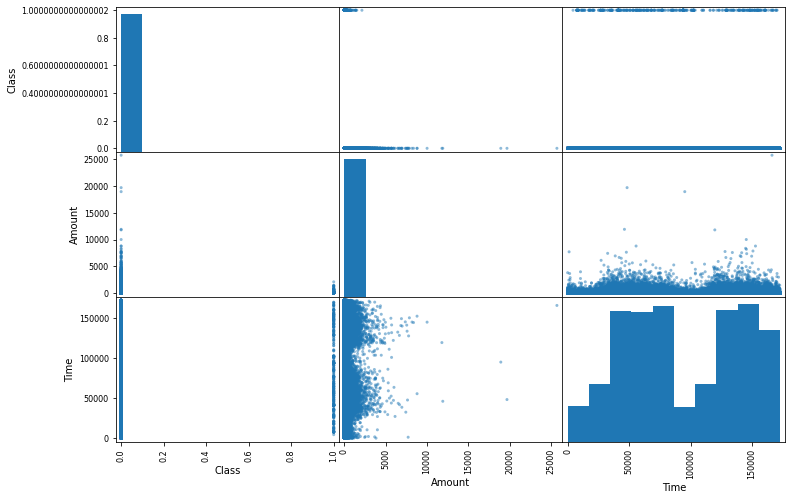

In [28]:
scatter_matrix(df[attributes],figsize=(12,8))

## Plotting Graph between two relations

In [29]:
#df.plot(kind="scatter",x="Amount",y="Time",alpha=0.8)

### Splitting Features and Labels

In [30]:
df= strat_train_set.drop("Class",axis=1)
df_labels = strat_train_set["Class"].copy()

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [32]:
df_labels.head()

265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int64

## Selecting a desired Model for Project

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(tol = 0.1, solver = "lbfgs")

### Training the Logistic Regression Model with Training Data

In [35]:
model.fit(df,df_labels)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

## Model Evaluation

### Accuracy Scores

In [36]:
from sklearn.metrics import accuracy_score
df_prediction = model.predict(df)
training_data_accuracy = accuracy_score(df_prediction,df_labels)

In [37]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9990256534047269


In [38]:
from sklearn.model_selection import cross_val_predict
df_labels_prediction = cross_val_predict(model,df,df_labels,cv=3)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [39]:
df_labels_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
#Calculating confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(df_labels,df_labels_prediction) #here true negative value=227339(not fraud) and true positive=265(fraud)
#also it wrongly detect that 129(fraud) and 112 is not fraud

array([[227339,    112],
       [   129,    265]], dtype=int64)

In [43]:
#confusion matrix---tells us difference between actual and predicted values

In [44]:
#confusion_matrix(df_labels,df_labels)----------this is the C.M. for perfect predictions

In [45]:
# Precision and Recall

In [46]:
from sklearn.metrics import precision_score , recall_score

In [47]:
#This is my precision score
precision_score(df_labels , df_labels_prediction)

0.7029177718832891

In [48]:
#This is my recall score
recall_score(df_labels , df_labels_prediction)

0.6725888324873096

In [49]:
#F1 Score--------it is harmonic mean of Precision and Recall

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(df_labels , df_labels_prediction)

0.6874189364461738

In [52]:
# check Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.73      0.69      0.71       394

    accuracy                           1.00    227845
   macro avg       0.87      0.84      0.85    227845
weighted avg       1.00      1.00      1.00    227845



In [54]:
a = model.predict(([[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]]))

In [55]:
if a==0:
    print("not-fraud")
else:
    print("fraud")

not-fraud


### Testing the Model on Test dataset

In [56]:
X_test = strat_test_set.drop("Class",axis=1)
Y_test = strat_test_set["Class"].copy()

In [57]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
11378,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
147283,88326.0,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07
219439,141734.0,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99
36939,38741.0,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50


In [58]:
Y_test.head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: Class, dtype: int64

### Testing the Logistic Regression Model with Testing Data

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.1, solver = 'lbfgs')
model.fit(X_test,Y_test)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [60]:
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [61]:
print('Accuracy on training data:',testing_data_accuracy)

Accuracy on training data: 0.998718443874864


In [62]:
from sklearn.model_selection import cross_val_predict
Y_test_prediction = cross_val_predict(model,X_test,Y_test,cv=3)

c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vishaish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [63]:
Y_test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
# confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(Y_test,Y_test_prediction)

array([[56845,    19],
       [   32,    66]], dtype=int64)

In [67]:
from sklearn.metrics import precision_score , recall_score

In [68]:
precision_score(Y_test,Y_test_prediction)

0.7764705882352941

In [69]:
recall_score(Y_test,Y_test_prediction)

0.673469387755102

In [70]:
from sklearn.metrics import f1_score

In [71]:
f1_score(Y_test,Y_test_prediction)

0.7213114754098361

In [72]:
#check classification report
from sklearn.metrics import classification_report
print(classification_report(df_labels,df_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.73      0.69      0.71       394

    accuracy                           1.00    227845
   macro avg       0.87      0.84      0.85    227845
weighted avg       1.00      1.00      1.00    227845



In [75]:
b= model.predict(([[19991,6.12449524659854,9.220959603831576,0.594441531014429,0.831361449291848,-0.438251891058399,9.952856746269619,3.103952620052453,4.202632271308045,6.25980134035345,7.488006105189272,1.35975075773462,2.30667922515537,6.894684960972537,8.05349876974199,9.493008565990855,8.220407875948814,0.917210067636597,-1.15115611954865,-0.669059470617799,-0.16709850094335,4.57700772387674,3.56319344091818,7.349677321831562,8.48720708205633,-0.131693969901409,-0.0664572940184434,-0.0723517969937994,0.0170472205768856,39.95]]))

In [76]:
if b==0:
    print("not-fraud")
else:
    print("fraud")

not-fraud
